In [1]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

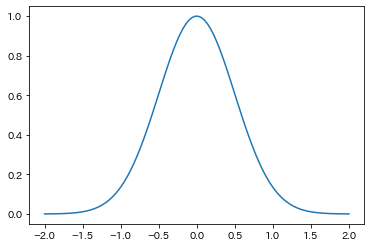

In [2]:
kernel = kernels.RBF(length_scale=.5)
# kernel = kernels.ExpSineSquared() * sk_kern.RBF()

# ほかにも色々と種類はある。ドキュメント参照
# kern = sk_kern.RationalQuadratic(length_scale=.5)
# kern = sk_kern.ConstantKernel()
# kern = sk_kern.WhiteKernel(noise_level=3.)

# 可視化は定義されていないので自分で用意する必要あり
X = np.linspace(-2, 2, 100)
plt.plot(X, kernel(X.reshape(-1, 1), np.array([[0.0]])))

In [3]:
kernel = (
    kernels.RBF(1.)
    + kernels.ConstantKernel(2.0)
    # + kernels.WhiteKernel()
)
clf = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-10,
    optimizer="fmin_l_bfgs_b",
    n_restarts_optimizer=20,
    normalize_y=True,
)

In [4]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
x_train = np.atleast_2d([0, 1., 3.5, 5., 6., 7., 8., 10]).T

# Observations
y_train = f(x_train).ravel()
clf.fit(x_train.reshape(-1, 1), y_train)

/Users/naoki/miniforge3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=1) + 1.41**2,
                         n_restarts_optimizer=20, normalize_y=True)

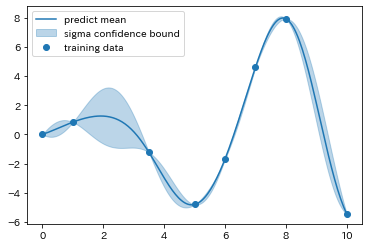

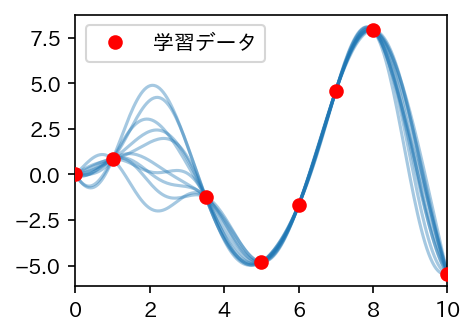

In [5]:
x_test = np.linspace(0.0, 10.0, 200).reshape(-1, 1)
pred_mean, pred_std = clf.predict(x_test, return_std=True)
plt.plot(x_test[:, 0], pred_mean, color="C0", label="predict mean")
plt.fill_between(
    x_test[:, 0],
    pred_mean + pred_std,
    pred_mean - pred_std,
    color="C0",
    alpha=0.3,
    label="sigma confidence bound",
)
plt.plot(x_train, y_train, "o", label="training data")
# plt.title("prediction")
plt.legend()
plt.show()

plt.figure(figsize=(4*0.8, 3*0.8), dpi=150)
pred_mean, pred_std = clf.predict(x_test, return_std=True)
y_samples = clf.sample_y(x_test, n_samples=10)
plt.plot(x_train, y_train, "o", color="red", label="学習データ", zorder=10)
for y_sample in y_samples.T:
    plt.plot(x_test, y_sample, "-", color="C0", alpha=0.4)
# plt.title("prediction")
plt.legend()
plt.xlim(0, 10)
plt.show()

In [6]:
#  First the noiseless case
x_train = np.atleast_2d([0, 1., 2.2, 3.5, 5., 6., 7., 8., 10]).T

# Observations
y_train = f(x_train).ravel()
clf.fit(x_train.reshape(-1, 1), y_train)

/Users/naoki/miniforge3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=1) + 1.41**2,
                         n_restarts_optimizer=20, normalize_y=True)

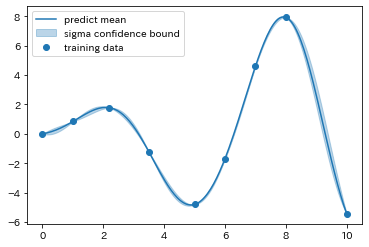

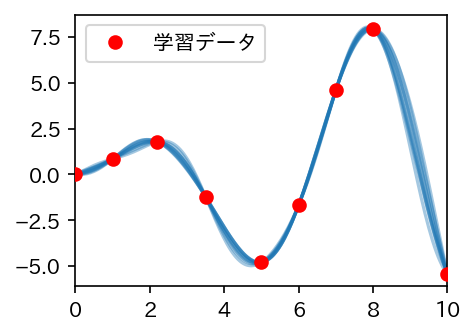

In [7]:
x_test = np.linspace(0.0, 10.0, 200).reshape(-1, 1)
pred_mean, pred_std = clf.predict(x_test, return_std=True)
plt.plot(x_test[:, 0], pred_mean, color="C0", label="predict mean")
plt.fill_between(
    x_test[:, 0],
    pred_mean + pred_std,
    pred_mean - pred_std,
    color="C0",
    alpha=0.3,
    label="sigma confidence bound",
)
plt.plot(x_train, y_train, "o", label="training data")
# plt.title("prediction")
plt.legend()
plt.show()

plt.figure(figsize=(4*0.8, 3*0.8), dpi=150)
pred_mean, pred_std = clf.predict(x_test, return_std=True)
y_samples = clf.sample_y(x_test, n_samples=10)
plt.plot(x_train, y_train, "o", color="red", label="学習データ", zorder=10)
for y_sample in y_samples.T:
    plt.plot(x_test, y_sample, "-", color="C0", alpha=0.4)
# plt.title("prediction")
plt.legend()
plt.xlim(0, 10)
plt.show()